# Dataproject - KY & NLA

In [1]:
import Dataproject as dp

SyntaxError: invalid syntax (Dataproject.py, line 1)

## Introduction

In this assignment we want to investigate the properties of a stock-portfolio containing three of the highest grossing companies in the united states. The aim of the project is to see what the 

In [2]:
%%capture #HidesOutput
aapl_df = yf.download('AAPL',
                      start='2019-01-01', 
                      end='2022-04-01', 
                      progress=False,
)
aapl_df.head()
tsla_df = yf.download('TSLA', 
                      start='2019-01-01', 
                      end='2022-04-01', 
                      progress=False,
)
tsla_df.head()
msft_df = yf.download('MSFT', 
                      start='2019-01-01', 
                      end='2022-04-01', 
                      progress=False,
)
msft_df.head()
sp500_df = yf.download('^GSPC', 
                      start='2019-01-01', 
                      end='2022-04-01', 
                      progress=False,
)
sp500_df.head()

In [3]:
#Her kunne cleaning være at man fjernede nogle colloner som gør det mere fokuseret.

In [4]:
aapl_ny = aapl_df.rename(columns={"Adj Close": "Apple"})
tsla_ny = tsla_df.rename(columns={"Adj Close": "Tesla"})
msft_ny = msft_df.rename(columns={"Adj Close": "Microsoft"})
sp500_ny = sp500_df.rename(columns={"Adj Close": "S&P500"})

aapl_adj = aapl_ny.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
tsla_adj = tsla_ny.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
msft_adj = msft_ny.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
sp500_adj = sp500_ny.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

frames = [aapl_adj, tsla_adj, msft_adj, sp500_adj]

Adjusted_close = pd.concat(frames, axis=1)

print(Adjusted_close)

                 Apple        Tesla   Microsoft       S&P500
Date                                                        
2018-12-31   38.233894    66.559998   98.014908  2506.850098
2019-01-02   38.277523    62.023998   97.580650  2510.030029
2019-01-03   34.464798    60.071999   93.990852  2447.889893
2019-01-04   35.936073    63.537998   98.362297  2531.939941
2019-01-07   35.856094    66.991997   98.487755  2549.689941
...                ...          ...         ...          ...
2022-03-25  174.720001  1010.640015  303.679993  4543.060059
2022-03-28  175.600006  1091.839966  310.700012  4575.520020
2022-03-29  178.960007  1099.569946  315.410004  4631.600098
2022-03-30  177.770004  1093.989990  313.859985  4602.450195
2022-03-31  174.610001  1077.599976  308.309998  4530.410156

[820 rows x 4 columns]


In [5]:
#def normalize_data(df): (IS IN .PY-FILE)
#    return df/df.iloc[0, :]

In [6]:
normalized_data = normalize_data(Adjusted_close)

<AxesSubplot:xlabel='Date', ylabel='Index'>

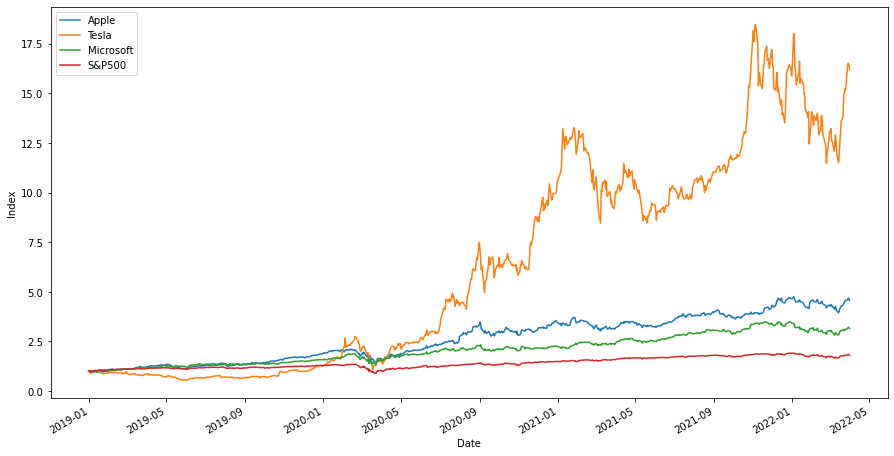

In [7]:
normalized_data.plot(ylabel='Index',figsize=(15,8))

In [8]:
#Evt. brug groupby

In [9]:
tickers = ['AAPL', 'TSLA', 'MSFT', '^GSPC']
start_date = dt.datetime(2019, 1, 1)
end_date = dt.datetime(2022, 4, 1)
 
data = pdr.get_data_yahoo(tickers, start_date, end_date, interval="m")['Adj Close']
 
log_returns = np.log(data/data.shift())

In [10]:
cov = log_returns.cov()
var = log_returns['^GSPC'].var()

beta_apple = cov.loc['AAPL', '^GSPC']/var
beta_tesla = cov.loc['TSLA', '^GSPC']/var
beta_microsoft = cov.loc['MSFT', '^GSPC']/var

In [11]:
print('Betavalues for the respective companies are: \n Apple =', "%.3f" %  beta_apple, '\n Tesla =', "%.3f" %  beta_tesla, ' \n Microsoft =', "%.3f" %  beta_microsoft)

Betavalues for the respective companies are: 
 Apple = 1.273 
 Tesla = 2.483  
 Microsoft = 0.857


In [12]:
weighted_beta = 0.5*beta_microsoft + 0.25*beta_apple + 0.25*beta_tesla
print('The weighted beta-value for our portfolio is', "%.3f" %  weighted_beta)

The weighted beta-value for our portfolio is 1.368
